# 简单线性回归教程（二）

### —— 用梯度下降法求解线性回归

In [1]:
from numpy import *
import matplotlib.pyplot as plt

#### 1. 导入数据

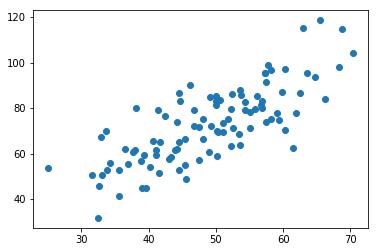

In [2]:
points = genfromtxt('data.csv', delimiter=',')
N = len(points)

# 提取 x，y
x = array(points[:,0])
y = array(points[:,1])

# 用plt做出散点图
plt.scatter(x,y)
plt.show()

### 2. 定义损失函数

In [3]:
# 定义线性模型 y = mx + b

def compute_cost(points, b, m):
    total_cost = 0
    
    N = len(points)
    
    # 计算所有误差平方的和 sum(y-mx-b)^2
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        
        total_cost += (y - m * x - b) ** 2
    
    return total_cost / float(N)

### 3. 定义模型的超参数

In [28]:
# 包括：步长（学习速率），初始点，迭代次数
learning_rate = 0.0002
# learning_rate = 10
initial_b = 0
initial_m = 0
num_iteration = 10

### 4. 定义梯度下降算法函数

In [29]:
def gradient_descent(points, initial_b, initial_m, learning_rate, num_iteration):
    b = initial_b
    m = initial_m
    
    # 用一个list记录所有的损失函数值
    cost_list = []
    
    for i in range(num_iteration):
        cost_list.append(compute_cost(points, b, m))
        b, m = step_grad_desc(b, m, array(points), learning_rate)
    
    return [b, m, cost_list]

def step_grad_desc(current_b, current_m, points, learning_rate):
    m_grad = 0
    b_grad = 0
    
    N = len(points)
    
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        m_grad += (current_m * x + current_b - y) * x
        b_grad += current_m * x + current_b - y
    
    m_update = current_m - learning_rate * m_grad * (2/float(N))
    b_update = current_b - learning_rate * b_grad * (2/float(N))
    
    return b_update, m_update

### 5. 测试：运行梯度下降函数来计算最优m和b

In [30]:
b, m , cost_list = gradient_descent(points, initial_b, initial_m, learning_rate, num_iteration)

print("final m: ", m)
print("final b: ", b)

final m:  1.478897166581077
final b:  0.030269551391295803


In [31]:
print("final cost: ", compute_cost(points,b,m))

final cost:  112.6499442565928


### 6. 画出损失函数随着迭代下降的过程

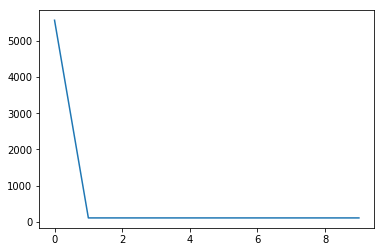

In [32]:
plt.plot(cost_list)
plt.show()

迭代5次之后，就达到了极小值

### 7. 画出拟合曲线

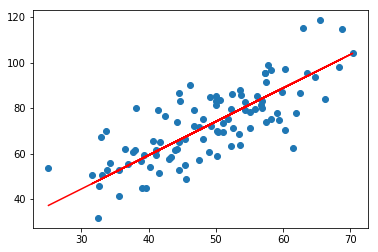

In [33]:
plt.scatter(x, y)

# 针对每一个x，求出预测值
y_pred = m * x + b

plt.plot(x, y_pred, c='r')

plt.show()